# Here is my oversimplified and rather naive understanding of the difference:

As we know, CBOW is learning to predict the word by the context. Or maximize the probability of the target word by looking at the context. And this happens to be a problem for rare words. For example, given the context yesterday was a really [...] day CBOW model will tell you that most probably the word is beautiful or nice. Words like delightful will get much less attention of the model, because it is designed to predict the most probable word. This word will be smoothed over a lot of examples with more frequent words.

On the other hand, the skip-gram model is designed to predict the context. Given the word delightful it must understand it and tell us that there is a huge probability that the context is yesterday was really [...] day, or some other relevant context. With skip-gram the word delightful will not try to compete with the word beautiful but instead, delightful+context pairs will be treated as new observations. 

UPDATE 
Thanks to @0xF for sharing this article

According to Mikolov

Skip-gram: works well with small amount of the training data, represents well even rare words or phrases. 

CBOW: several times faster to train than the skip-gram, slightly better accuracy for the frequent words

One more addition to the subject is found here:

In the "skip-gram" mode alternative to "CBOW", rather than averaging the context words, each is used as a pairwise training example. That is, in place of one CBOW example such as [predict 'ate' from average('The', 'cat', 'the', 'mouse')], the network is presented with four skip-gram examples [predict 'ate' from 'The'], [predict 'ate' from 'cat'], [predict 'ate' from 'the'], [predict 'ate' from 'mouse']. (The same random window-reduction occurs, so half the time that would just be two examples, of the nearest words.)

# size
The size of the dense vector to represent each token or word (i.e. the context or neighboring words). If you have limited data, then size should be a much smaller value since you would only have so many unique neighbors for a given word. If you have lots of data, it’s good to experiment with various sizes. A value of 100–150 has worked well for me for similarity lookups.

# window
The maximum distance between the target word and its neighboring word. If your neighbor’s position is greater than the maximum window width to the left or the right, then, some neighbors would not be considered as being related to the target word. In theory, a smaller window should give you terms that are more related. Again, if your data is not sparse, then the window size should not matter too much, as long as it’s not overly narrow or overly broad. If you are not too sure about this, just use the default value.

# min_count
Minimium frequency count of words. The model would ignore words that do not satisfy the min_count. Extremely infrequent words are usually unimportant, so its best to get rid of those. Unless your dataset is really tiny, this does not really affect the model in terms of your final results. The settings here probably has more of an effect on memory usage and storage requirements of the model files.

In [1]:
#1.SKip-Gram
sentences = [['I','love','nlp'],
            ['I','will','learn','nlp','in','2','months'],
            ['nlp','is','future'],
            ['nlp','saves','time','and','solves','lot','of','industry','problems'],
            ['nlp','uses','machine','learning']]



In [2]:
!pip install gensim

In [3]:
import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# training the model
skipgram = Word2Vec(sentences, size=50, window=3, min_count=1, sg=1)   # size=50 is the vector size generated and window is the window size
print(skipgram)

Word2Vec(vocab=21, size=50, alpha=0.025)


In [4]:
print(skipgram['nlp'])

[ 0.00635744  0.0051293  -0.00277831 -0.00270683 -0.00248992  0.00741263
 -0.0039787   0.00242408  0.00943866  0.00031503 -0.0007166   0.00718955
 -0.00146831 -0.00815664 -0.00025254  0.00321442 -0.00237877 -0.00655138
 -0.00856669  0.00194858  0.0014044  -0.00143516  0.00059123 -0.00303426
  0.00984291 -0.00726434 -0.00826846 -0.00994215  0.00971438 -0.00534669
 -0.00377108 -0.00782043  0.00667465 -0.00995996 -0.00768117 -0.00907919
 -0.00460835  0.00690831  0.00642458  0.00155871 -0.00991143  0.00194336
 -0.0056366  -0.00285388 -0.00184906 -0.00721714  0.00213259 -0.00364706
  0.00888661  0.00170614]


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [5]:
print(skipgram['deep'])

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


KeyError: "word 'deep' not in vocabulary"

We get an error saying the word doesn't exist because the word was not in the input training data. this is the reason we need to train the algorithm on as much data possible so that we do not miss out on words. 

In [6]:
#save the model
skipgram.save('skipgram.bin')

In [7]:
#load the model
skipgram = Word2Vec.load('skipgram.bin')

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app


0 I
1 love
2 nlp
3 will
4 learn
5 in
6 2
7 months
8 is
9 future
10 saves
11 time
12 and
13 solves
14 lot
15 of
16 industry
17 problems
18 uses
19 machine
20 learning


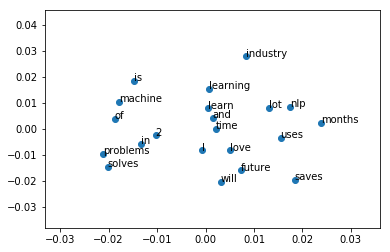

In [8]:
#T-SNE plot is one of the way to evaluate word embeddings. let's generate it and see how it looks
X = skipgram[skipgram.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

#create a scatter plot of the projection
plt.scatter(result[:,0],result[:,1])
words = list(skipgram.wv.vocab)
for i,word in enumerate(words):
    print(i,word)
    plt.annotate(word,xy=(result[i,0],result[i,1]))
plt.show()

In [9]:
#Fast text
import gensim
from gensim.models import FastText
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#training the model
fast = FastText(sentences,size=50,window=1,min_count=1,workers=5,min_n=1,max_n=2)   #size=50 is the vector size generated and window is the window size
print(fast)

FastText(vocab=21, size=50, alpha=0.025)


In [10]:
print(fast['nlp'])

[-1.6116517e-03 -2.6842437e-03 -1.4123161e-03 -4.8961694e-04
 -4.8116664e-04  1.6734602e-03 -2.2624386e-05  4.4859196e-03
  2.2521161e-03 -8.1064715e-04 -2.8372363e-03  6.4982567e-04
 -8.2040662e-03 -2.4926509e-03  2.7148155e-03  6.0103331e-03
  1.4134098e-03  2.4951077e-03  2.2029295e-03 -3.8821306e-03
  6.4711738e-03  3.8110465e-03  3.1327577e-03  3.0084548e-03
 -3.1696958e-03  8.2021458e-03 -5.5361572e-03  2.2495505e-03
  1.4435770e-03  3.4889353e-03 -4.7196541e-04 -2.9955360e-03
  5.4041822e-03  3.4371947e-03  3.8074008e-03 -1.4279892e-03
  4.0042456e-03 -4.8689794e-04 -3.1099482e-03 -6.1368402e-03
 -2.8052935e-03  3.7885355e-03  1.6308230e-03  7.5960229e-04
  4.4073914e-03 -3.9003673e-03  2.8369459e-03 -1.4616726e-03
  2.4039266e-03 -2.8064598e-03]


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [11]:
print(fast['deep'])

[ 4.7452399e-03 -9.1636665e-03  1.3828727e-03 -4.6521514e-03
  3.4524724e-03  7.8290300e-03  2.4587449e-03  3.8682255e-03
  8.3747529e-04 -1.2427722e-03 -2.4132669e-04  5.1589143e-03
 -3.2853026e-05 -8.8954186e-03 -1.6255452e-03  8.8872120e-04
 -9.7734726e-04 -8.1042629e-03  4.0100040e-03  4.6066276e-04
 -1.6338048e-03  1.5637162e-03 -1.4283519e-03 -2.9010703e-03
  1.2116297e-03  5.0408964e-04  2.8342567e-03  2.6176386e-03
  8.7231351e-03  3.0406285e-03  1.8482351e-03  2.2859189e-04
  5.8266858e-04 -1.0922629e-02  6.9695464e-03  1.1250170e-04
 -2.5109801e-04 -2.9413395e-03  2.3658089e-03 -3.8245535e-03
  4.2527895e-03 -2.6765801e-03  1.4963622e-03  2.6379805e-04
 -4.7155507e-03  2.2200383e-03 -1.3752767e-03  5.3509986e-03
  1.5914544e-05  3.7306680e-03]


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [12]:
fast.save('fast.bin')

In [13]:
fast = FastText.load('fast.bin')

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app


0 I
1 love
2 nlp
3 will
4 learn
5 in
6 2
7 months
8 is
9 future
10 saves
11 time
12 and
13 solves
14 lot
15 of
16 industry
17 problems
18 uses
19 machine
20 learning


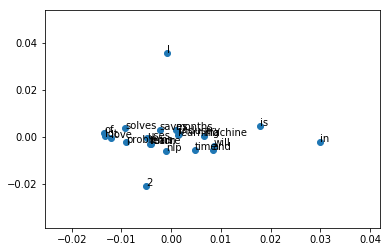

In [14]:
#T-SNE plot is onw of the way to evaluate word embeddings. let's generate it and see how it looks
X= fast[fast.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

#create a scatter plot of the projection
plt.scatter(result[:,0],result[:,1])
words = list(fast.wv.vocab)
for i,word in enumerate(words):
    print(i,word)
    plt.annotate(word,xy=(result[i,0],result[i,1]))
plt.show()

In [ ]:
model = Word2Vec.load_word2vec_format('C:')